<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Ago25-26/Tarea2Ago25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MÉTODO GRADIENTE DESCENDENTE

Para ayudarme a mí a entender mejor hice un repaso de todo lo visto en clase, el método como tal está al final

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

print(x)
print(y)

[1896. 1900. 1904. 1906. 1908. 1912. 1920. 1924. 1928. 1932. 1936. 1948.
 1952. 1956. 1960. 1964. 1968. 1972. 1976. 1980. 1984. 1988. 1992. 1996.
 2000. 2004. 2008.]
[12.   11.   11.   11.2  10.8  10.8  10.8  10.6  10.8  10.3  10.3  10.3
 10.4  10.5  10.2  10.    9.95 10.14 10.06 10.25  9.99  9.92  9.96  9.84
  9.87  9.85  9.69]


Podemos hacerlo con un polinomio simple:

In [3]:
#Minimos cuadrados:
#Lo que se quiere es obtener w0 y w1
def w(x, y):
  X = np.vstack((np.ones_like(x), x)).T #CREA UNA FILA DE VECTORES UNO, una con X y luego crea la matriz
  Xt = X.T
  XtX = np.matmul(Xt, X)
  XtXi = np.linalg.inv(XtX)
  Xy = np.matmul(Xt, y)
  w = np.matmul(XtXi, Xy)
  cost = 0
  f = 0
  for i in range(len(w)):
    f += w[i]*x**i
  cost = (y-f)**2
  cost = cost.sum()
  return w, cost


W, costo = w(x, y)
#Pendiente: W[1]
print(f"w0: {W[0]}, w1: {W[1]}")
print(f"Costo: {costo}")

w0: 36.41645590249904, w1: -0.013330885710960805
Costo: 1.3582919828427618


O podemos hacerlo con los 5 polinomios hechos en clase:

In [4]:
#Mínimos cuadrados regularizados:
#Para los mínimos cuadrados regularizados se regulariza la manera en la que se
#aproxima, no es bueno que nuestra aproximación toque todos los puntos
#Para regularizar se usa lambda

def w_n1(x, y, norder, lbda = 0):
  x = np.asarray([x])
  X = np.ones_like(x)

  for n in range(1, norder + 1):
    X = np.append(X, x**n, axis = 0)
  X = X.T
  t = y
  XX = np.matmul(X.T, X)
  NI = len(X)*lbda*np.identity(len(XX))
  invXX = np.linalg.inv(XX + NI)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  cost = 0
  f = 0
  for i in range(len(w)):
    f += w[i]*x**i
  cost = (y-f)**2
  cost = cost.sum()
  return w, cost


Recordando:

La función de costo (o pérdida) mide la diferencia, o error, entre la "y" real y la "y" pronosticada en su posición actual.
Entonces, cuando se imprime "Costo" son los erroes de las gráficas de 5 ordenes, basicamente.

Conforme hay más ordenes de nuestro polinomio, evidentemente habrá más w0, w1,..., wn. Como se puede visualizar:

Costo orden 1: 7.538576178108003
W orden 1: [0.03919714 0.00543233]


Costo orden 2: 1.277479461872996
W orden 2: [ 1.37941146e-04  2.61378073e-02 -1.06743304e-05]


Costo orden 3: 1.0820769729269841
W orden 3: [ 2.44510058e-04  1.57606549e-01 -1.46400086e-04  3.50232975e-08]


Costo orden 4: 0.8546967886398947
W orden 4: [ 5.55517229e-07  1.13487683e-03  2.84446189e-04 -2.84634613e-07
  7.17156415e-11]


Costo orden 5: 0.7696683213010017
W orden 5: [-9.47850964e-03  5.04517229e-05  1.00677046e-02 -1.54281934e-05
  7.88509857e-09 -1.34366850e-12]




Text(0.5, 0, 'Año olimpico')

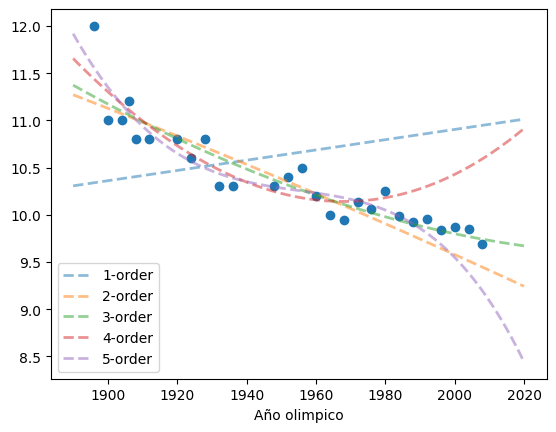

In [5]:
x_test = np.linspace(1890, 2020, 100)
norder = 5
plt.scatter(x, y)
costos = []
w = []
for n in range(1, norder + 1):
  w_test, cost = w_n1(x[:20], y[:20], n, lbda = 0.2)
  ftest = 0
  for i in range(len(w_test)):
    ftest += w_test[i]* x_test**i
  plt.plot(x_test, ftest, '--', linewidth = 2, label  = f'{n}-order', alpha = 0.5)

  costos.append(cost)
  w.append(w_test)
  print(f"Costo orden {n}: {costos[n-1]}")
  print(f"W orden {n}: {w_test}")
  print("\n")

plt.legend()
plt.xlabel('Año olimpico')

Recordando, la función costo:
$$\lambda = \frac{1}{2N}\sum_{i}^{N} f\left [ \left ( x_{i}w_{i} \right ) - t_{i}\right ]^{2}$$

Costos: [7.538576178108003, 1.277479461872996, 1.0820769729269841, 0.8546967886398947, 0.7696683213010017]
W:  [array([0.03919714, 0.00543233])
 array([ 1.37941146e-04,  2.61378073e-02, -1.06743304e-05])
 array([ 2.44510058e-04,  1.57606549e-01, -1.46400086e-04,  3.50232975e-08])
 array([ 5.55517229e-07,  1.13487683e-03,  2.84446189e-04, -2.84634613e-07,
         7.17156415e-11])
 array([-9.47850964e-03,  5.04517229e-05,  1.00677046e-02, -1.54281934e-05,
         7.88509857e-09, -1.34366850e-12])                                 ]


<ipython-input-6-162b676e0169>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w1 = np.array(w)


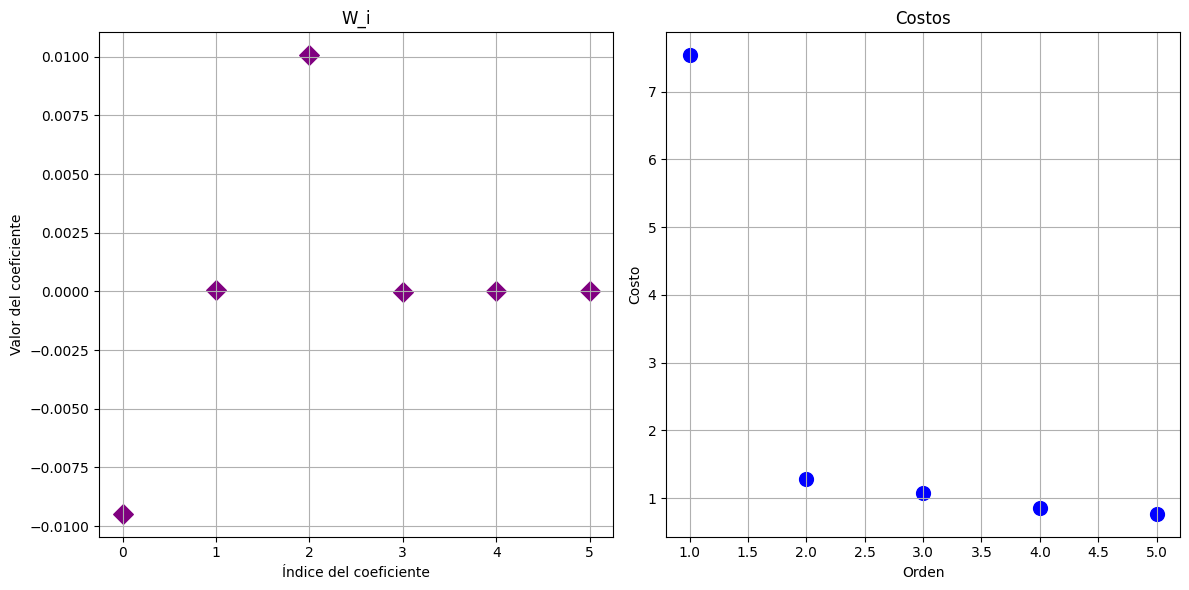

In [6]:
#Graficamos errores:
print("Costos:", costos)
w1 = np.array(w)
print("W: ", w1)

# Seleccionar los coeficientes del último orden (norder) desde la matriz w1
last_order_coefficients = w1[norder - 1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot de los coeficientes del último orden
ax1.scatter(range(len(last_order_coefficients)), last_order_coefficients, color="purple", marker="D", s=99)
ax1.set_title("W_i")
ax1.set_ylabel("Valor del coeficiente")
ax1.set_xlabel("Índice del coeficiente")
ax1.grid()

# Scatter plot de los costos
ax2.scatter(range(1, norder + 1), costos, color="blue", marker="o", s=99)
ax2.set_title("Costos")
ax2.set_ylabel("Costo")
ax2.set_xlabel("Orden")
ax2.grid()

plt.tight_layout()
plt.show()

La validación cruzada k-fold es una técnica que ayuda a evaluar el rendimiento de un modelo de aprendizaje automático de manera robusta y precisa al dividir el conjunto de datos en k subconjuntos (folds). La función KFold de scikit-learn simplifica este proceso, ya que se encarga de:


KFold toma el número de folds (k) como argumento y divide automáticamente los datos en k subconjuntos de aproximadamente igual tamaño. Cada subconjunto se utilizará como conjunto de prueba en una iteración.
Para cada iteración de validación cruzada, KFold genera los índices de
los datos que se utilizarán como conjunto de entrenamiento y prueba.
Estos índices permiten acceder a los datos correspondientes en cada iteración.
KFold puede incluir la opción shuffle=True para reorganizar aleatoriamente
los datos antes de dividirlos. También puede utilizarse la opción
stratified=True para realizar una estratificación, asegurando que las
proporciones de las clases en los subconjuntos sean similares.
El generador creado por KFold permite un bucle que itera a
través de cada fold. En cada iteración, tendrás acceso a los índices de
entrenamiento y prueba correspondientes al fold actual.

Ejemplo:

In [7]:
from sklearn.model_selection import KFold

# Datos de ejemplo
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Crea una instancia de KFold con 3 folds
kf = KFold(n_splits=3)

# Itera a través de los folds
for train_idx, test_idx in kf.split(data):
    train_data, test_data = data[train_idx], data[test_idx]
    print("Entrenamiento:", train_data)
    print("Prueba:", test_data)
    print("---")

Entrenamiento: [ 5  6  7  8  9 10]
Prueba: [1 2 3 4]
---
Entrenamiento: [ 1  2  3  4  8  9 10]
Prueba: [5 6 7]
---
Entrenamiento: [1 2 3 4 5 6 7]
Prueba: [ 8  9 10]
---


 Los datos iniciales son un array con 10 elementos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Luego, al usar KFold con n_splits=3, se está dividiendo los datos en 3 subconjuntos (folds) para realizar validación cruzada.

El propósito de la validación cruzada k-fold es asegurarse de que cada subconjunto se use tanto para entrenamiento como para prueba en diferentes iteraciones. Esto significa que en cada iteración, uno de los subconjuntos se utilizará como conjunto de prueba y los otros como conjunto de entrenamiento.

En el primer fold, los datos se dividen en train_data (entrenamiento) y test_data (prueba):

Entrenamiento: [5, 6, 7, 8, 9, 10]
Prueba: [1, 2, 3, 4]

En el segundo fold, la división cambia:

Entrenamiento: [1, 2, 3, 4, 8, 9, 10]
Prueba: [5, 6, 7]

Terminado el repaso:

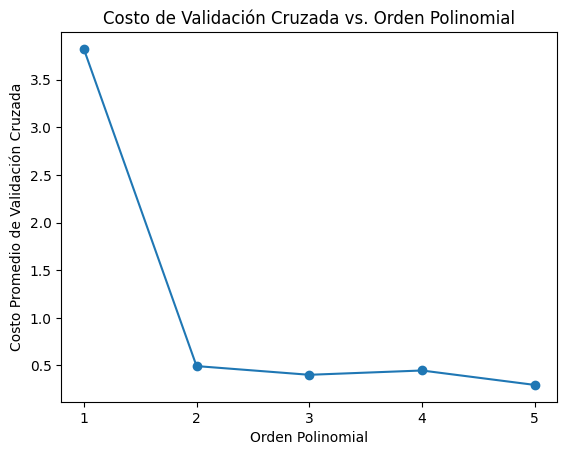

In [8]:
def w_n1(x, y, norder, lbda=0):
    # Genera la matriz de Vandermonde X
    X = np.vander(x, norder + 1, increasing=True)
    t = y.reshape((-1, 1))

    # Calcula la inversa regularizada usando la fórmula de Ridge regression
    """
    "@" se utiliza para realizar operaciones de multiplicación de matrices
    (también conocido como producto matricial) o para realizar productos punto
    (producto escalar) entre dos arrays.
    """

    XX = X.T @ X
    NI = len(X) * lbda * np.identity(len(XX))
    invXX = np.linalg.inv(XX + NI)
    Xt = X.T @ t
    w = invXX @ Xt

    # Calcula los valores predichos y el costo
    # Creamos la "función": f(xiwi -ti)
    f = X @ w

    """
    f.flatten() se utiliza para convertir una matriz o un array bidimensional
    en un array unidimensional, lo que también se conoce como
    "aplanar" la matriz.
    """
    # Basicamente, la función costo!!
    cost = np.sum((y - f.flatten())**2)

    return w, cost

def k_fold_cross_validation(x, y, n_splits, norder, lbda):
    # Crea el objeto de validación cruzada KFold
    # Como se vio en el ejemplo, crea arreglos en 'orden n' splits
    kf = KFold(n_splits=n_splits)
    avg_cost = 0

    # Itera a través de cada fold
    for train_idx, test_idx in kf.split(x):
      # Código que se ejecutará en cada iteración del loop
      # train_idx contiene los índices de entrenamiento para el fold actual
      # test_idx contiene los índices de prueba para el fold actual

        # Datos de entrenamiento:
        x_train, y_train = x[train_idx], y[train_idx]
        # Datos de prueba:
        x_test, y_test = x[test_idx], y[test_idx]

        # Entrena el modelo y obtén el costo en el conjunto de prueba
        w, cost = w_n1(x_train, y_train, norder, lbda)

        # Matriz para los datos de prueba
        X_test = np.vander(x_test, norder + 1, increasing=True)
        # Calculo de predicciones por el vector de pesos w produce una estimación
        f_test = X_test @ w
        # Calculo de costos usando cross_validación
        cost_test = np.sum((y_test - f_test.flatten())**2)

        # Acumula el costo para promediar
        avg_cost += cost_test / n_splits

    return avg_cost

norder = 5
lbda = 0.2

costos = []

# Realiza validación cruzada k-fold para diferentes órdenes polinomiales
for n in range(1, norder + 1):
    avg_cost = k_fold_cross_validation(x, y, norder, n, lbda)
    costos.append(avg_cost)

# Grafica los resultados
plt.plot(range(1, norder + 1), costos, marker='o')
plt.xlabel('Orden Polinomial')
plt.ylabel('Costo Promedio de Validación Cruzada')
plt.title('Costo de Validación Cruzada vs. Orden Polinomial')
plt.xticks(range(1, norder + 1))
plt.show()

Con datos míos:



[ 4.32853336e+01 -7.43562321e-02  1.62887637e-05]
w0: 43.28533364443212, w1: -0.07435623207384445, w2: 1.6288763696840397e-05


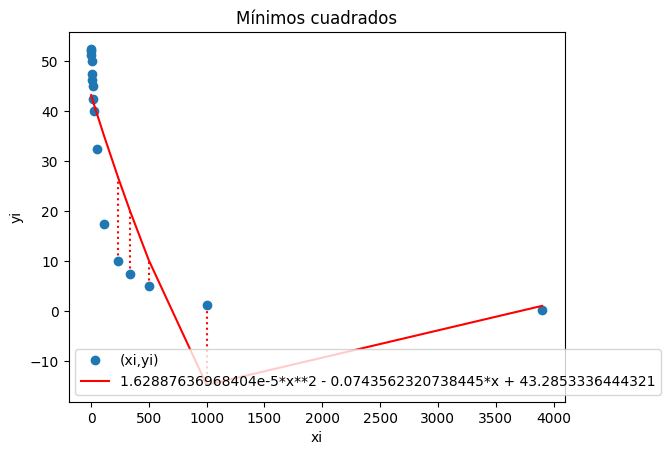

In [12]:
data1 = np.loadtxt("/content/drive/MyDrive/ML2023/Datos.txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

def w(x, y):
  X = np.vstack((np.ones_like(x), x,x**2 )).T #CREA UNA FILA DE VECTORES UNO, una con X y luego crea la matriz
  Xt = X.T
  XtX = np.matmul(Xt, X)
  XtXi = np.linalg.inv(XtX)
  Xy = np.matmul(Xt, y)
  w = np.matmul(XtXi, Xy)
  return w

W = w(x, y)
print(W)
#DEFINIR UNA FUNCIÓN PARA QUE AHORA y = wo + w1x + w2x**2
w0 = W[0]
w1 = W[1]
w2 = W[2]
print(f"w0: {w0}, w1: {w1}, w2: {w2}")
x_ = sp.Symbol("x")
f = w0 + w1*x_ + w2*x_**2
f_x = sp.lambdify(x_,f)
f_i = f_x(x)

for i in range(0,n,1):
  y0 = np.min([y[i],f_i[i]])
  y1 = np.max([y[i],f_i[i]])
  plt.vlines(x[i],y0,y1, color='red',
             linestyle='dotted')

plt.plot(x,y,'o', label='(xi,yi)')#Imprimir puntos
plt.plot(x,f_i, color = 'red', label=f) #Predicción
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Mínimos cuadrados')
plt.legend()
plt.show()

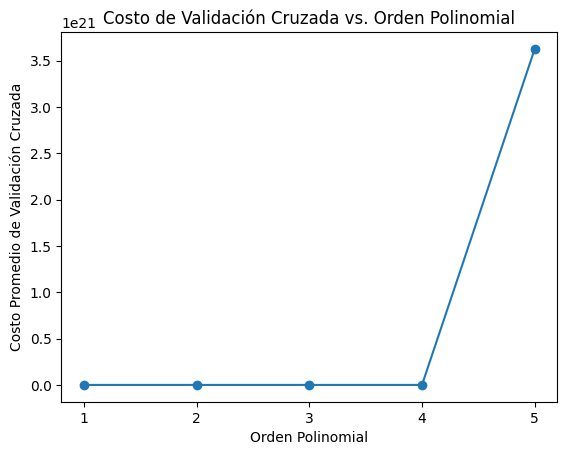

In [10]:
data1 = np.loadtxt("/content/drive/MyDrive/ML2023/Datos.txt", delimiter=',').T
x = data1[0]
y = data1[1]

def w_n1(x, y, norder, lbda=0):
    # Genera la matriz de Vandermonde X
    X = np.vander(x, norder + 1, increasing=True)
    t = y.reshape((-1, 1))

    # Calcula la inversa regularizada usando la fórmula de Ridge regression
    """
    "@" se utiliza para realizar operaciones de multiplicación de matrices
    (también conocido como producto matricial) o para realizar productos punto
    (producto escalar) entre dos arrays.
    """

    XX = X.T @ X
    NI = len(X) * lbda * np.identity(len(XX))
    invXX = np.linalg.inv(XX + NI)
    Xt = X.T @ t
    w = invXX @ Xt

    # Calcula los valores predichos y el costo
    # Creamos la "función": f(xiwi -ti)
    f = X @ w

    """
    f.flatten() se utiliza para convertir una matriz o un array bidimensional
    en un array unidimensional, lo que también se conoce como
    "aplanar" la matriz.
    """
    # Basicamente, la función costo!!
    cost = np.sum((y - f.flatten())**2)

    return w, cost

def k_fold_cross_validation(x, y, n_splits, norder, lbda):
    # Crea el objeto de validación cruzada KFold
    # Como se vio en el ejemplo, crea arreglos en 'orden n' splits
    kf = KFold(n_splits=n_splits)
    avg_cost = 0

    # Itera a través de cada fold
    for train_idx, test_idx in kf.split(x):
      # Código que se ejecutará en cada iteración del loop
      # train_idx contiene los índices de entrenamiento para el fold actual
      # test_idx contiene los índices de prueba para el fold actual

        # Datos de entrenamiento:
        x_train, y_train = x[train_idx], y[train_idx]
        # Datos de prueba:
        x_test, y_test = x[test_idx], y[test_idx]

        # Entrena el modelo y obtén el costo en el conjunto de prueba
        w, cost = w_n1(x_train, y_train, norder, lbda)

        # Matriz para los datos de prueba
        X_test = np.vander(x_test, norder + 1, increasing=True)
        # Calculo de predicciones por el vector de pesos w produce una estimación
        f_test = X_test @ w
        # Calculo de costos usando cross_validación
        cost_test = np.sum((y_test - f_test.flatten())**2)

        # Acumula el costo para promediar
        avg_cost += cost_test / n_splits

    return avg_cost

norder = 5
lbda = 0.2

costos = []

# Realiza validación cruzada k-fold para diferentes órdenes polinomiales
for n in range(1, norder + 1):
    avg_cost = k_fold_cross_validation(x, y, norder, n, lbda)
    costos.append(avg_cost)

# Grafica los resultados
plt.plot(range(1, norder + 1), costos, marker='o')
plt.xlabel('Orden Polinomial')
plt.ylabel('Costo Promedio de Validación Cruzada')
plt.title('Costo de Validación Cruzada vs. Orden Polinomial')
plt.xticks(range(1, norder + 1))
plt.show()